<a href="https://colab.research.google.com/github/YunJiye/project_Pzone/blob/vision/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 내 구글 드라이브로 이동
#%cd "/content/drive/MyDrive"

# Yolov5 github 레포지토리 clone
!git clone https://github.com/ultralytics/yolov5.git

# 필요한 모듈 설치
!pip install -U -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14378, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14378 (delta 1), reused 4 (delta 0), pack-reused 14371
Receiving objects: 100% (14378/14378), 13.60 MiB | 4.59 MiB/s, done.
Resolving deltas: 100% (9902/9902), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 4.7 MB/s 
     |████████████████████████████████| 761 kB 49.0 MB/s 
     |████████████████████████████████| 9.4 MB 66.3 MB/s 
     |████████████████████████████████| 17.1 MB 58.9 MB/s 
     |████████████████████████████████| 3.2 MB 62.0 MB/s 
     |████████████████████████████████| 280 kB 67.9 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 33.8 MB 365 kB/s 
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:49tcmalloc: large alloc 1147494400

In [ ]:
import torch

#파이토치 버전 확인, cuda device properties 확인
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.13.0+cu117 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
"""!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QcAdQ7dtBY0p29RfznGZ")
project = rf.workspace("new-workspace-29pun").project("parking-occupancy-dataset-al6")
dataset = project.version(5).download("yolov5")"""

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QcAdQ7dtBY0p29RfznGZ")
project = rf.workspace("testpr3-2tk7v").project("park_aug_aug_v7")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 318 kB/s 
     |████████████████████████████████| 67 kB 3.6 MB/s 
     |████████████████████████████████| 138 kB 29.5 MB/s 
     |████████████████████████████████| 178 kB 67.3 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 145 kB 62.5 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b420ab3776ffa6376b06cffc1a579380fce433c5a2fd89b1cd065b4ff64c8e7e
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Suc

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to park_aug_aug_v7-2 in yolov5pytorch:: 100%|██████████| 7582/7582 [00:03<00:00, 2437.16it/s]


In [ ]:
!cp -r /content/park_aug_aug_v7-2 /content/drive/MyDrive/data

In [ ]:
!cp -r /content/yolov5/ /content/drive/MyDrive/yolov5

In [ ]:
from glob import glob

# 이미지 경로 list로 넣기 
train_img_list = glob('/content/drive/MyDrive/data/train/images/*.jpg') + glob('/content/drive/MyDrive/data/train/images/*.jpeg')
valid_img_list = glob('/content/drive/MyDrive/data/valid/images/*.jpg') + glob('/content/drive/MyDrive/data/valid/images/*.jpeg')
mytrain_img_list=glob('/content/drive/MyDrive/train/image/*.jpg')+glob('/content/drive/MyDrive/train/image/*.jpeg')


train_img_list += mytrain_img_list

# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')
 


In [ ]:

!python /content/drive/MyDrive/yolov5/train.py --img 320 --batch 16 --epochs 30 --data /content/drive/MyDrive/data/data.yaml --weights yolov5x.pt --name result --cfg /content/drive/MyDrive/yolov5/models/yolov5x.yaml

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5x.pt, cfg=/content/drive/MyDrive/yolov5/models/yolov5x.yaml, data=/content/drive/MyDrive/data/data.yaml, hyp=drive/MyDrive/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=drive/MyDrive/yolov5/runs/train, name=result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifa

In [5]:
from glob import glob
# 이미지 경로 list로 넣기 
#test_img_list = glob('/content/drive/MyDrive/CCTV/*.jpg')
test_img = glob('/content/drive/MyDrive/주차장/Images/*.jpg')+glob('/content/drive/MyDrive/주차장/Images/*.jpeg')

#source : 테스트 이미지(혹은 폴더)경로
#weights: 학습이 완료된 weight 파일 경로(pt형식)
#conf: conf_threshold값 (0~1사이값)
#class score가 설정한 값을 넘겨야 바운딩 박스를 그린다.
#for test_name in test_img_list:
#  !python /content/yolov5/detect.py --source {test_name} --weights /content/drive/MyDrive/models/result3/weights/best.pt --img 320 --conf 0.5

#TODO: 라운딩 박스 좌표값 추출
for test_imt in test_img:
  !python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/result3/weights/best.pt --img 320 --conf 0.5 --source {test_imt}
  print(test_imt)
  

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/result3/weights/best.pt'], source=/content/drive/MyDrive/주차장/Images/001_H.jpg, data=drive/MyDrive/yolov5/data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86180143 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/주차장/Images/001_H.jpg: 192x320 4 1s, 31.6ms
Speed: 0.3ms pre-process, 31.6ms inference, 1.9ms NMS per image at shape (1, 3, 320, 320)
Results saved to drive/MyDrive/yolov5/runs/detect/exp
/content/drive/MyDrive/주차장

In [4]:
import os, glob, shutil
#테스트 파일 전체 삭제

dir = '/content/drive/MyDrive/yolov5/runs/detect/'
filelist = glob.glob(os.path.join(dir,"*"))
for f in filelist:
  shutil.rmtree(f)

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/data/')

In [ ]:

import os, glob, shutil
#테스트 파일 전체 삭제

#dir = '/content/drive/MyDrive/data'
#filelist = glob.glob(os.path.join(dir,"*"))
#for f in filelist:
#  os.remove(f)

최종이미지 : res_Image.jpg
(나머지 나오는 jpg, txt파일들은 무시해도 무관함)

필요한 셋업 파일 및 정보

1. empty/label에 디텍팅 박스 좌표 정보(좌에서 우순으로 수정함)

2. parking.txt : 주차장 모습을 텍스트로 표현

3. parkingArea.txt : cctv순서대로 담당하고 있는 주차 구역에 대한 좌표 정보

4. cntPP : 코드 안에서 cctv마다 담당하고 있는 주차 구역의 수를 알려주는 배열



In [ ]:
from dataclasses import dataclass 
from google.colab import drive
from google.colab.patches import cv2_imshow
import random
import cv2
import os
import csv
import time
import numpy as np
from queue import Queue

In [ ]:
@dataclass
class DOT:
  row: int = None
  col: int = None
  number: int = None


map = [['z' for col in range(1001)] for row in range(1001)]
tmp_map = [['z' for col in range(1001)] for row in range(1001)]
parking_map = [[["z" for idx1 in range(1001)] for idx2 in range(1001)] for idx3 in range(100)]
comment = ["none" for idx in range(1001)]
rowSize = 0; colSize = 0;
i = 0; j = 0;
#입구 위치
startX = 0; startY = 0;
#주차 공간 정보
parkingPlace = [DOT() for idx in range(1001)]
road = [list() for idx in range(1001)]
emptyFlag = ['z' for i in range(1001)] # "a"면 빈칸 "A"면 차있는 칸
direction = ['z' for i in range(1001)]
numOfPP = 0
ppIdx = 0
dx = [1,-1,0,0]
dy = [0,0,1,-1]

visit = [[0 for col in range(1001)]for row in range(1001)]

#초기 디텍팅박스 좌표 정보
initialBox = []
mappingBox = []

#cctv 담당 구역 개수(초기 정보)
cntPP  = [4,4,4,4,4,4,5,4,5,4]


## 빈공간 좌표 정보 넣는 함수

In [ ]:
def initBox():
  #수정
  for i in range(10):
    f = open("/content/drive/MyDrive/empty/labels/001_" + chr(ord("A") + i)+".txt", 'r')
    tmpList = []
    while True:
      line = f.readline()

      if not line:break

      e,a,b,c,d = line.split()

      e=int(e)
      a=float(a)
      b=float(b)
      c=float(c)
      d=float(d)

      tmpList.append(e)
      tmpList.append(a)
      tmpList.append(b)
      tmpList.append(c)
      tmpList.append(d)
    
    initialBox.append(tmpList)

  f = open("/content/drive/MyDrive/parkingArea.txt", 'r')
  
  while True:
    line = f.readline()

    if not line:break

    x = line.split()

    for i in range(1, len(x)):
      x[i] = int(x[i])

    mappingBox.append(x)

  f.close()

## parking.txt 구축

In [ ]:
def makeTXT():
  #elem => A구역부터 차량 여부(1, 0)와 디텍팅 박스 좌표 정보
  #mappingBox를 통해 (방향, 좌표1, 좌표2....) 차량 여부를 써줘야함.
  idx = 0
  for elem in initialBox:
    mapIdx = 1
    for i in range(0, len(elem), 5):
      if elem[i] == 1:
        #제대로 된 mapIdx 찾아주기
        #cctv가 4대의 주차구역을 담당
        calList = []

        if cntPP[idx] == 4:
          for j in range(1,5):
            calList.append(abs(0.1*j*2-elem[i+1]))
   
        #cctv가 5대의 주차구역을 담당
        elif cntPP[idx] == 5:
          for j in range(1,10,2):
            calList.append(abs(0.1*j-elem[i+1]))

        mapIdx = calList.index(min(calList))
        mapIdx = mapIdx*2+1

        x = mapIdx
        y = mapIdx+1
        map[mappingBox[idx][x]][mappingBox[idx][y]] = "A"

        if mappingBox[idx][0] == "d":
          map[mappingBox[idx][x]+1][mappingBox[idx][y]] = "A"
          map[mappingBox[idx][x]+2][mappingBox[idx][y]] = "A"
        elif mappingBox[idx][0] == "l":
          map[mappingBox[idx][x]][mappingBox[idx][y]-1] = "A"
          map[mappingBox[idx][x]][mappingBox[idx][y]-2] = "A"
      
      #mapIdx += 2

      #elif elem[i] == 0:


    idx += 1
    
    

## 가는 길 만드는 함수

In [ ]:
def searchRoad(idx, x, y, cost):
  road[idx].append(DOT(row = x, col = y, number = -1))
  while(True):
    for k in range(4):
      nx = x + dx[k]
      ny = y + dy[k]

      if nx < 0 or ny < 0 or nx > rowSize or ny > colSize : continue
      if visit[nx][ny] == cost-1:
        road[idx].append(DOT(row = nx, col = ny, number = -1))
        x = nx
        y = ny
        cost  -= 1
        break
    
    if cost <= 1 : break


## bfs

In [ ]:

def bfs(num):
  for i in range(rowSize+1):
    for j in range(colSize+1):
      tmp_map[i][j] = map[i][j]
      visit[i][j] = 0

  #q = list()
  q = Queue()
  #q.append((startX, startY, 1))
  q.put((startX, startY, 1))

  visit[startX][startY] = 1

  dirIdx = 0

  while q.empty() == False:
    tmp = q.get()
    x = tmp[0]
    y = tmp[1]
    cost = tmp[2]

    for k in range(4):
      nx = x + dx[k]
      ny = y + dy[k]

      if (nx < 0) or (ny < 0) or (nx > rowSize) or (ny > colSize) : continue
      if (tmp_map[nx][ny] == 'd') or (tmp_map[nx][ny] == 'e') or (tmp_map[nx][ny] == 'f') or (tmp_map[nx][ny] == 'z') : continue
      if visit[nx][ny] >= 1 : continue

      visit[nx][ny] = cost + 1
      q.put((nx,ny,cost+1))

      if tmp_map[nx][ny] == 'a' or tmp_map[nx][ny] == 'A':
        for t in range(1001):
          if parkingPlace[t].row == None:
            parkingPlace[t].row = nx
            parkingPlace[t].col = ny
            #parkingPlace[ppIdx].number = ppIdx
            parkingPlace[t].number = t
            emptyFlag[t] = tmp_map[nx][ny]
            dirIdx = t
            break

        #searchRoad(ppIdx, nx, ny, cost+1)
        searchRoad(t, nx, ny, cost+1)

        map[nx][ny] = 'f'

        for l in range(4):
          px = nx + dx[l]
          py = ny + dy[l]

          if px < 0 or py < 0 or px > rowSize or py > colSize : continue

          if tmp_map[px][py] == 'a' or tmp_map[px][py] == 'A':
            if l == 0:
              direction[dirIdx] = 'd'
            elif l == 1:
              direction[dirIdx] = 'u'
            elif l == 2:
              direction[dirIdx] = 'r'
            elif l == 3:
              direction[dirIdx] = 'l'
            map[px][py] = 'f'
            map[px+dx[l]][py+dy[l]] = 'f'

            break
      
        #q.clear()
        return


## 주차장 평면도 출력

In [ ]:
def printMap(m):
  for i in range(rowSize+1):
    for j in range(colSize+1):
      print(m[i][j], end = "")
    print()

## 주차 공간의 정보(행 위치, 열 위치, 우선순위 번호)를 출력

In [ ]:
def printParkingPlace():
  for i in range(numOfPP):
    print(parkingPlace[i].row, parkingPlace[i].col, parkingPlace[i].number, emptyFlag[i])

##주차 공간 까지 가는 길을 칸 하나하나 보여줌

In [ ]:
def printRoad(idx):
  print("parkingPlace :", parkingPlace[idx].row, parkingPlace[idx].col)
  
  for i in range(len(road[idx])):
    print(road[idx][i][0], road[idx][i][1])

In [ ]:
def makeTXTRoad(idx):
  f = open("road.txt", "w")

  tmpStr = "parkingPlace :" + str(parkingPlace[idx].row) + " " + str(parkingPlace[idx].col) + "\n"
  f.write(tmpStr)
  
  for i in range(len(road[idx])):
    tmpStr = str(road[idx][i].row) + " " + str(road[idx][i].col) + "\n"
    f.write(tmpStr)

  f.close()

## 주차 공간까지 가는데에 필요한 정보(네비게이션)을 구축

In [ ]:
def makeComment():
  for idx in range(numOfPP):
    dIdx = 3
    nx = startX + dx[dIdx]
    ny = startY + dy[dIdx]
    num = 2
    flag = 0
    tmp_com = ""

    while parking_map[idx][nx][ny] != 'U':
      #print(parking_map[idx][nx][ny])
      if parking_map[idx][nx + dx[dIdx]][ny + dy[dIdx]] == 'P' : num += 2
      else:
        tmp_com += "전방으로 약" + str(num) + "미터 직진 후 "
        num = 2

        for k in range(4):
          cx = nx + dx[k]
          cy = ny + dy[k]

          if cx < 0 or cy < 0 or cx > rowSize or cy > colSize : continue
          if parking_map[idx][cx][cy] == 'U' :
            tmp_com += "\n주차 공간 도착입니다. \n"
            comment[idx] = tmp_com
            flag = 1
            break
        

        if flag == 0:
          if dIdx == 3:
            if parking_map[idx][nx+dx[0]][ny+dy[0]] == 'P':
              dIdx = 0; tmp_com += "좌회전 입니다. \n이어서 "
            elif parking_map[idx][nx+dx[1]][ny + dy[1]] == 'P':
              dIdx = 1; tmp_com += "우회전 입니다. \n이어서 "
          elif dIdx == 2:
            if parking_map[idx][nx+dx[0]][ny+dy[0]] == 'P':
              dIdx = 0; tmp_com += "우회전 입니다. \n이어서 "
            elif parking_map[idx][nx+dx[1]][ny + dy[1]] == 'P':
              dIdx = 1; tmp_com += "좌회전 입니다. \n이어서 "
          elif dIdx == 1:
            if parking_map[idx][nx+dx[2]][ny+dy[2]] == 'P':
              dIdx = 2; tmp_com += "좌회전 입니다. \n이어서 "
            elif parking_map[idx][nx+dx[3]][ny + dy[3]] == 'P':
              dIdx = 3; tmp_com += "우회전 입니다. \n이어서 "
          elif dIdx == 0:
            if parking_map[idx][nx+dx[2]][ny+dy[2]] == 'P':
              dIdx = 2; tmp_com += "우회전 입니다. \n이어서 "
            elif parking_map[idx][nx+dx[3]][ny + dy[3]] == 'P':
              dIdx = 3; tmp_com += "좌회전 입니다. \n이어서 "
        else : break
      nx = nx + dx[dIdx]; ny = ny + dy[dIdx]
    

## 가는 길이 표시된 맵을 구축

In [ ]:
def makeRoadMap():
  for idx in range(numOfPP):
    one = parkingPlace[idx]
    map[one.row][one.col] = 'U'

    for k in range(4):
      nx = one.row + dx[k]
      ny = one.col + dy[k]

      if nx < 0 or ny < 0 or nx > rowSize or ny > colSize : continue
      if map[nx][ny] == 'f':
        two = DOT(row = nx, col = ny, number = -1)
        three = DOT(row = nx + dx[k], col = ny + dy[k], number = -1)
    
    map[two.row][two.col] = 'U'
    map[three.row][three.col] = 'U'

    for k in range(1, len(road[idx])-1):
      map[road[idx][k].row][road[idx][k].col] = 'P'
    
    for i in range(rowSize+1):
      for j in range(colSize+1):
        parking_map[idx][i][j] = map[i][j]
    
    for k in range(1, len(road[idx]) - 1):
      map[road[idx][k].row][road[idx][k].col]  = '0'

    map[one.row][one.col] = 'f'
    map[two.row][two.col] = 'f'
    map[three.row][three.col] = 'f'

## 메인

In [ ]:
drive.mount('/content/drive', force_remount = True)

#모두 비어있을 때의 좌표 구축
initBox()

f = open("/content/drive/MyDrive/parking.txt", 'r', encoding = 'cp949')

for i in range(1000):
  for j in range(1000):
    map[i][j] = 'z'

i = 0; j = 0

numOfPP = int(f.readline())

c = f.read()

for k in range(len(c)):
  if c[k] == '\n':
    j = 0; i+=1; continue
  
  if c[k] == 'c':
    startX = i; startY = j

  map[i][j] = c[k]
  j += 1

  rowSize = max(i, rowSize)
  colSize = max(j, colSize)

#주차공간마다 차량 여부 맵핑
makeTXT()

for n in range(numOfPP):
  bfs(n)

makeRoadMap();
makeComment();

wfp = open("parkingPlace.txt", "w")

for i in range(numOfPP):
    tmpStr = str(parkingPlace[i].row) + " " + str(parkingPlace[i].col) + " " + str(parkingPlace[i].number) + " " + str(emptyFlag[i]) + " " + direction[i] + "\n"
    wfp.write(tmpStr)

fcom = open("comment.txt", "w")

for i in range(numOfPP):
  if emptyFlag[i] == 'a':
    makeTXTRoad(i)
    fcom.write(comment[i])
    break


fcom.close()
f.close()
wfp.close()

Mounted at /content/drive


## 이미지 만들기

RGB : (106,157,255)

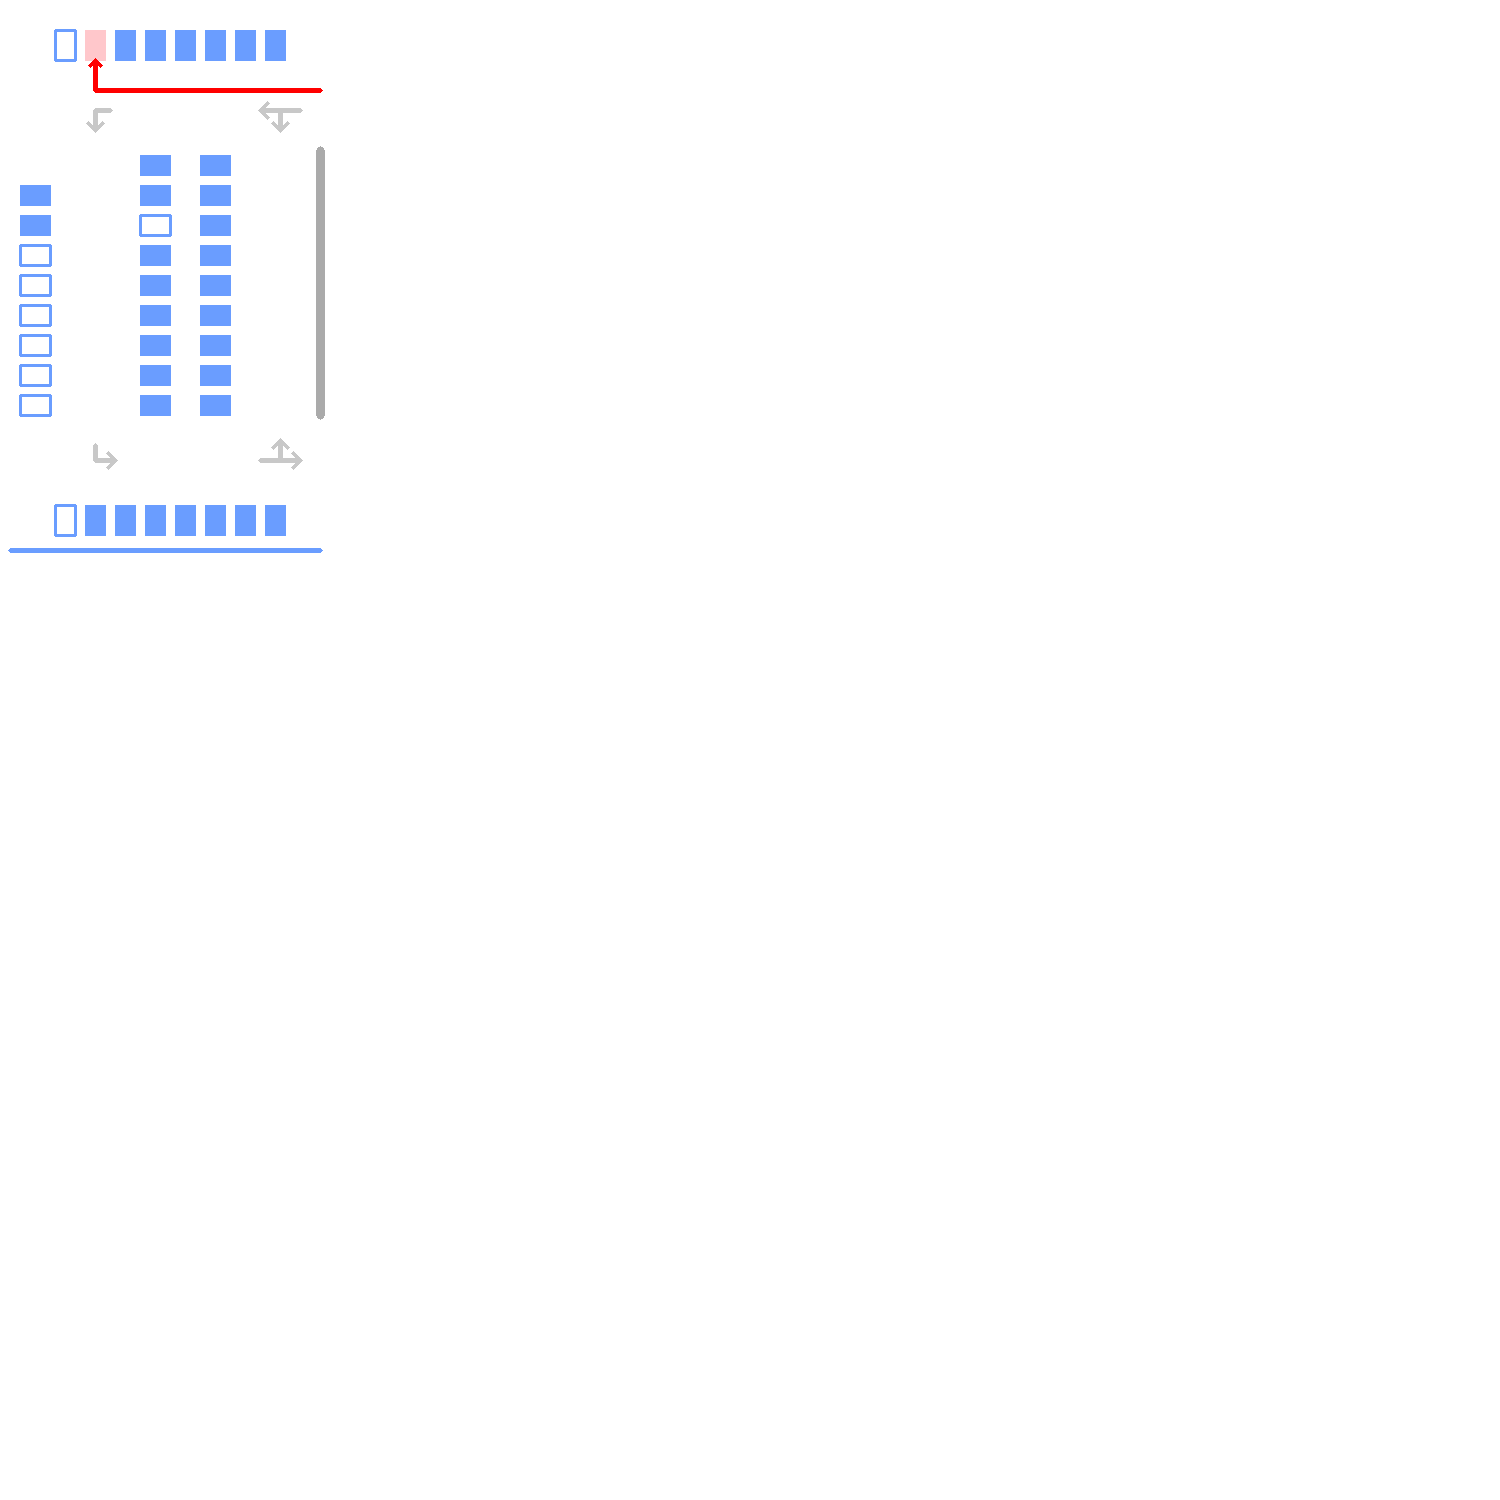

In [ ]:
class dot:
  row: int = None
  col: int = None
  number: int = None
  flag: int = None #이미 주차되어 있는지 여부
  direc : str = None

fp = open("parkingPlace.txt", "r")
fp2 = open("road.txt", "r")

line = fp2.readline()
line = line[14:]
a, b = line.split()
a = int(a); b= int(b)

parkingMap = [dot() for i in range(int(1001))]

idx = 0

while True:
    line = fp.readline()
    if not line: break
    row, col, number, flag, direc = line.split()
    parkingMap[idx].row = int(row)
    parkingMap[idx].col = int(col)
    parkingMap[idx].number = int(number)
    parkingMap[idx].direc = direc
    if flag == "A":
        parkingMap[idx].flag = 1
    elif flag == 'a':
        parkingMap[idx].flag = 0
    idx+=1

#txt파일에서 주차 공간 중 a로 되어 있는 곳은 빈 주차 공간, A로 되어 있는 곳은 주차가 이미 되어 있는 공간

img = np.full((1500,1500,3), 255, np.uint8)

#주차장 라인
cv2.line(img, (320, 150), (320, 415), (170,170,170), 7)

cv2.line(img, (110, 110), (95, 110), (200,200,200), 3)
cv2.arrowedLine(img, (95,110), (95,130), (200,200,200), 3, tipLength = 0.5)

cv2.line(img, (95, 445), (95, 460), (200,200,200), 3)
cv2.arrowedLine(img, (95,460), (115,460), (200,200,200), 3, tipLength = 0.5)

cv2.line(img, (260, 460), (280, 460), (200,200,200), 3)
cv2.arrowedLine(img, (280,460), (280,440), (200,200,200), 3, tipLength = 0.5)
cv2.arrowedLine(img, (280,460), (300,460), (200,200,200), 3, tipLength = 0.5)

cv2.line(img, (300, 110), (280, 110), (200,200,200), 3)
cv2.arrowedLine(img, (280,110), (280,130), (200,200,200), 3, tipLength = 0.5)
cv2.arrowedLine(img, (280,110), (260,110), (200,200,200), 3, tipLength = 0.5)


#주차장 그리기
for i in range(1001):
    if a == parkingMap[i].row and b == parkingMap[i].col:
        color = (203, 199, 255)
        colorFlag = -1
    else:
        if parkingMap[i].flag == 1:
            color = (255,157,106)
            colorFlag = -1
        else:
            color = (255,157,106)
            colorFlag = 2

    if parkingMap[i].row == None: break
    else:
        if parkingMap[i].direc == "u":
            cv2.rectangle(img, (
            parkingMap[i].col * 15+10,
                parkingMap[i].row * 15),(parkingMap[i].col*15 + 30,parkingMap[i].row*15 + 30),
                          color, colorFlag)

        elif parkingMap[i].direc == "d":
            cv2.rectangle(img, (
            parkingMap[i].col * 15+10,
                parkingMap[i].row * 15+25), (parkingMap[i].col*15 + 30, parkingMap[i].row*15 + 55),
                          color, colorFlag)

        elif parkingMap[i].direc == "l":
            cv2.rectangle(img, (
            parkingMap[i].col * 15+20,
                parkingMap[i].row * 15+20), (parkingMap[i].col*15 - 10, parkingMap[i].row*15 + 40),
                          color, colorFlag)
        
        elif parkingMap[i].direc == "r":
            cv2.rectangle(img, (
            parkingMap[i].col * 15+20,
                parkingMap[i].row * 15+40), (parkingMap[i].col*15 +50, parkingMap[i].row*15 +20),
                          color, colorFlag)

for i in range(1001):
    if a == parkingMap[i].row and b == parkingMap[i].col:
        ch = parkingMap[i].direc
        break

roadList = []

while True:
    line = fp2.readline()

    if not line: break

    a,b = line.split()
    a = int(a); b = int(b)

    roadList.append((a,b))

roadList.reverse()

if ch == 'd':
    del roadList[len(roadList)-1]

for i in range(len(roadList)-1):
    a, b = roadList[i]
    c, d = roadList[i+1]
    if ch == 'u':
        if i == len(roadList)-2:
            cv2.arrowedLine(img, (b * 15 + 5+15, a * 15 + 30), (d * 15 + 5+15, c * 15 + 30), (0, 0, 255), 3, tipLength = 0.5)
        else:
            cv2.line(img, (b*15+5+15,a*15+30), (d*15+5+15,c*15+30), (0,0,255), 3)
    elif ch == 'l':
        if i == len(roadList)-2:
            cv2.arrowedLine(img, (b * 15 + 5+15, a * 15 + 5+25), (d * 15 + 5+15, c * 15 + 5+25), (0, 0, 255), 3, tipLength = 0.5)
        else:
            cv2.line(img, (b*15+5+15,a*15+5+25), (d*15+5+15,c*15+5+25), (0,0,255), 3)
    elif ch == 'r':
        if i == len(roadList)-2:
            cv2.arrowedLine(img, (b * 15 + 5+10, a * 15 + 5+25), (d * 15 + 5+10, c * 15 + 5+25), (0, 0, 255), 3, tipLength = 0.5)
        else:
            cv2.line(img, (b * 15+5+10, a * 15 + 5+25), (d * 15 + 5+10, c * 15 + 5+25), (0, 0, 255), 3)
    elif ch == 'd':
        if i == len(roadList)-2:
            cv2.arrowedLine(img, (b * 15 + 5 + 15, a * 15 + 20 + 15), (d * 15 + 5 + 15, c * 15 + 20+15), (0, 0, 255), 3, tipLength = 0.5)
        else:
            cv2.line(img, (b*15+5 + 15, a*15+20+15), (d*15+5 + 15, c*15+20+15), (0,0,255), 3)

cv2.line(img, (10, 550), (320, 550), (255,157,106), 3)


cv2_imshow(img)
cv2.imwrite("Image.jpg", img)
cv2.waitKey()
cv2.destroyAllWindows()

fp.close()
fp2.close()

## 네비게이션 사진에 텍스트 붙이기


In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

fontsize = 16
fnt = ImageFont.truetype("/content/drive/MyDrive/NanumGothic.ttf", fontsize)
img = Image.open("/content/Image.jpg")
draw = ImageDraw.Draw(img)

# 텍스트 위치 설정을 위해 이미지 사이즈를 도출합니다.
w, h = img.size

txt_file = open("comment.txt", "r")
text = txt_file.read()
txt_file.close()

#text = "샘플 글자"

w_txt, h_txt = draw.textsize(text, fnt)

margin = 500
x = w - w_txt - 1200
y = h - h_txt - 850
draw.text((x,y), text, fill = 'black', font = fnt)

img.show()
img.save("res_Image.jpg")

saveImg = cv2.imread("res_Image.jpg")

saveImg = saveImg[0:660, 0:330]

cv2.imwrite("/content/drive/MyDrive/res_Image.jpg", saveImg)

#cv2.imwrite("/content/drive/MyDrive/res_Image.jpg",)

True